In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df=pd.read_csv("gas_turbines.csv")

In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [44]:
df=df.drop(['AFDP','GTEP'],axis=1)

In [45]:
df.head()

,AT,AP,AH,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,1059.7,549.98,114.72,10.612,3.2484,82.311


In [46]:
df.isnull().sum()

AT     0
AP     0
AH     0
TIT    0
TAT    0
TEY    0
CDP    0
CO     0
NOX    0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TIT     15039 non-null  float64
 4   TAT     15039 non-null  float64
 5   TEY     15039 non-null  float64
 6   CDP     15039 non-null  float64
 7   CO      15039 non-null  float64
 8   NOX     15039 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [49]:
X = df.iloc[:,0:5].values
X

array([[   6.8594, 1007.9   ,   96.799 , 1059.2   ,  550.    ],
       [   6.785 , 1008.4   ,   97.118 , 1059.3   ,  550.    ],
       [   6.8977, 1008.8   ,   95.939 , 1059.4   ,  549.87  ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , 1037.7   ,  537.32  ],
       [   7.006 , 1006.8   ,   99.008 , 1043.2   ,  541.24  ],
       [   6.9279, 1007.2   ,   97.533 , 1049.9   ,  545.85  ]])

In [50]:
Y = df['TEY']

In [51]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.4397781 , -0.82664395,  1.28143632, -1.48837592,  0.58524028],
       [-1.44960109, -0.74864748,  1.30456402, -1.4823253 ,  0.58524028],
       [-1.43472138, -0.68625031,  1.21908576, -1.47627469,  0.56871459],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, -2.78925732, -1.02664984],
       [-1.42042259, -0.99823616,  1.44159024, -2.4564737 , -0.52833681],
       [-1.43073409, -0.93583899,  1.33465179, -2.05108275,  0.05768949]])

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [69]:
model = Sequential()
model.add(Dense(6,input_dim = 5,activation ='relu',kernel_initializer='normal'))
model.add(Dense(7,input_dim =6,activation ='relu',kernel_initializer='normal'))
model.add(Dense(1,activation ='relu'))

adam=Adam(lr=0.01) #eta

C:\Users\Shamikarani\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [70]:
result = model.compile(loss='mean_squared_error',optimizer ='adam' ,metrics=['mse'])

In [71]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 6)                 36        
                                                                 
 dense_29 (Dense)            (None, 7)                 49        
                                                                 
 dense_30 (Dense)            (None, 1)                 8         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [72]:
result = model.fit(X,Y,validation_split=0.30, epochs=200, batch_size=25)

Epoch 1/200
422/422 [==============================] - 3s 4ms/step - loss: 17286.3633 - mse: 17286.3633 - val_loss: 13169.3496 - val_mse: 13169.3496
Epoch 2/200
422/422 [==============================] - 1s 3ms/step - loss: 7693.4595 - mse: 7693.4595 - val_loss: 2724.9292 - val_mse: 2724.9292
Epoch 3/200
422/422 [==============================] - 2s 5ms/step - loss: 1023.2042 - mse: 1023.2042 - val_loss: 624.1349 - val_mse: 624.1349
Epoch 4/200
422/422 [==============================] - 2s 4ms/step - loss: 371.2125 - mse: 371.2125 - val_loss: 314.0062 - val_mse: 314.0062
Epoch 5/200
422/422 [==============================] - 1s 3ms/step - loss: 189.7676 - mse: 189.7676 - val_loss: 156.7547 - val_mse: 156.7547
Epoch 6/200
422/422 [==============================] - 1s 3ms/step - loss: 107.1723 - mse: 107.1723 - val_loss: 91.7244 - val_mse: 91.7244
Epoch 7/200
422/422 [==============================] - 1s 3ms/step - loss: 70.4877 - mse: 70.4877 - val_loss: 62.1930 - val_mse: 62.1930
Epoch

In [73]:
scores = model.evaluate(X, Y)

470/470 [==============================] - 1s 2ms/step - loss: 0.6063 - mse: 0.6063


In [74]:
result.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [75]:
print("Accuracy is ", scores[1])

Accuracy is  0.6062950491905212


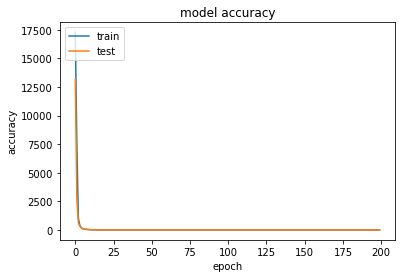

In [76]:
import matplotlib.pyplot as plt
plt.plot(result.history['mse'])
plt.plot(result.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

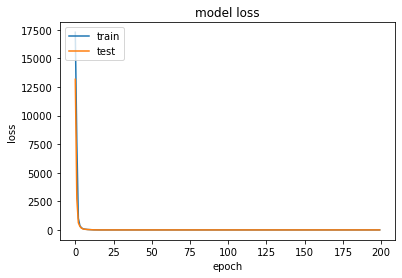

In [79]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()